## WDBC PCA

In [1]:
import pandas as pd

# Data is Wisconsin Diagnosis Breast Cancer -- from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).
# Load the dataset and have a look. (Names for the dataset are in another file, annoyingly.)
df = pd.read_csv('wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# The outcome (target) = 'M' (malignant) or 'B' (benign).
# It is in the column at index 1
df.iloc[:,1].unique()

array(['M', 'B'], dtype=object)

In [4]:
# Feature labels are as follows:
column_labels = ['patient_id', 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']

In [5]:
df.columns = column_labels
df
# This could also be done with: df.rename(columns={0:  'patient ID', etc.

,patient_id,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [6]:
# We may want to change the 'M' and 'B' labels to full names so it's easier to read. Or not.
df['diagnosis'].replace('B', 'Benign', inplace=True)
df['diagnosis'].replace('M', 'Malignant', inplace=True)
df

,patient_id,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,Malignant,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,Malignant,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,Malignant,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,Malignant,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,Malignant,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,Malignant,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,Malignant,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,Malignant,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,Malignant,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,Malignant,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [7]:
# Put the features, labels into their own dataframes
feature_df = df.iloc[:,2:]
label_df = df.iloc[:,1]

In [8]:
# Use sklearn to standardise (specifically: normalise) the data so that 
# the data has a normal distribution -- mean = 0; stdev = 1
from sklearn.preprocessing import StandardScaler
import numpy as np

x = feature_df.values
x = StandardScaler().fit_transform(x)
# ... and check if it worked
np.mean(x),np.std(x)

(1.2487570048507913e-18, 1.0)

In [9]:
# x is now a numpy array. Convert it back to a df?
# ******************************
# WHY?!?!?
# ******************************
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()
normalised_breast

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


In [10]:
# Choose the first 2 principal components
from sklearn.decomposition import PCA

pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

principal_breast_df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

In [11]:
# One thing that's often useful is "how much of the variance is explained"
# in any principal component. We can find out that 44.28% is explained
# by PC1; 18.97 by PC2:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

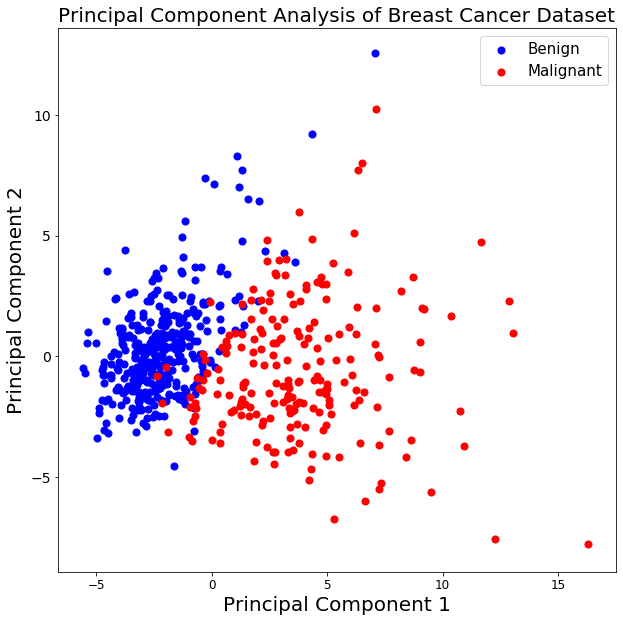

In [12]:
# Let's plot it!
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = label_df == target
    plt.scatter(principal_breast_df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [13]:
# How many principal components do we need to explain the variance in data?
pca = PCA().fit(x)

evr = pca.explained_variance_ratio_
print('\n'.join('{:2d}: {:0.4f}'.format(*k) for k in enumerate(evr)))
# FYI: We have to go to 6 significant digits to explain the last PC.

 0: 0.4427
 1: 0.1897
 2: 0.0939
 3: 0.0660
 4: 0.0550
 5: 0.0402
 6: 0.0225
 7: 0.0159
 8: 0.0139
 9: 0.0117
10: 0.0098
11: 0.0087
12: 0.0080
13: 0.0052
14: 0.0031
15: 0.0027
16: 0.0020
17: 0.0018
18: 0.0016
19: 0.0010
20: 0.0010
21: 0.0009
22: 0.0008
23: 0.0006
24: 0.0005
25: 0.0003
26: 0.0002
27: 0.0001
28: 0.0000
29: 0.0000


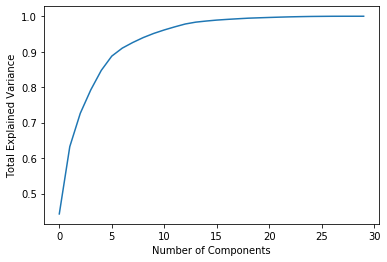

In [14]:
# Graph it...
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance');

## Gisette

In [242]:
# GISETTE is a handwritten digit recognition problem. The problem is to separate the highly confusible digits '4' and '9'. This dataset is one of five datasets of the NIPS 2003 feature selection challenge.
# Put the features, labels into their own dataframes

feature_df_train = pd.read_csv('gisette_train.data', header=None, delim_whitespace=True)


In [243]:
feature_df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,0,674,0,0,838
4,0,0,0,0,0,0,0,608,0,979,...,991,0,0,828,0,0,0,0,0,0


In [200]:
label_df_train = pd.read_csv('gisette_train.labels', header=None)

In [201]:
df_train['Labels'] = label_df_train[label_df_train.columns[0]]
df_train['Labels'] = df_train['Labels'].map({1:'Positive', -1:'Negative'}) 

In [202]:
#label_df_train = label_df_train.iloc[:,0]

In [203]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,Labels
0,550,0,495,0,0,0,0,976,0,0,...,0,0,991,991,0,0,0,0,983,Positive
1,0,0,0,0,0,0,0,976,0,0,...,475,0,991,0,0,991,0,0,0,Negative
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,674,0,0,838,Positive
4,0,0,0,0,0,0,0,608,0,979,...,0,0,828,0,0,0,0,0,0,Positive


In [204]:
#df_train.loc[:, (df_train != 0).any(axis=0)]

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,Labels
0,550,0,495,0,0,0,0,976,0,0,...,0,0,991,991,0,0,0,0,983,Positive
1,0,0,0,0,0,0,0,976,0,0,...,475,0,991,0,0,991,0,0,0,Negative
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,674,0,0,838,Positive
4,0,0,0,0,0,0,0,608,0,979,...,0,0,828,0,0,0,0,0,0,Positive
5,0,0,0,0,0,0,0,0,0,0,...,0,0,983,0,0,0,0,0,0,Positive
6,0,0,0,0,0,0,0,0,0,0,...,0,0,541,0,0,945,0,0,0,Positive
7,0,0,991,0,0,0,0,0,0,0,...,0,0,0,0,0,631,0,0,483,Positive
8,0,0,983,0,0,652,0,0,0,0,...,0,0,0,0,983,991,0,0,0,Negative
9,0,0,0,0,0,0,0,770,0,983,...,0,0,684,705,0,0,0,0,656,Positive


In [205]:
feature_df_train

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,0,674,0,0,838
4,0,0,0,0,0,0,0,608,0,979,...,991,0,0,828,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,983,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,541,0,0,945,0,0,0
7,0,0,991,0,0,0,0,0,0,0,...,995,0,0,0,0,0,631,0,0,483
8,0,0,983,0,0,652,0,0,0,0,...,568,0,0,0,0,983,991,0,0,0
9,0,0,0,0,0,0,0,770,0,983,...,0,0,0,684,705,0,0,0,0,656


In [206]:
# Use sklearn to standardise (specifically: normalise) the data so that 
# the data has a normal distribution -- mean = 0; stdev = 1
from sklearn.preprocessing import StandardScaler
import numpy as np

x = feature_df_train.values
x = StandardScaler().fit_transform(x)
# ... and check if it worked
np.mean(x),np.std(x)

(-2.17544500931884e-19, 0.9954898291795854)

In [207]:
# x is now a numpy array. Convert it back to a df?
# ******************************
# WHY?!?!?
# ******************************
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_gisette = pd.DataFrame(x,columns=feat_cols)
normalised_gisette.tail()
normalised_gisette

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature4990,feature4991,feature4992,feature4993,feature4994,feature4995,feature4996,feature4997,feature4998,feature4999
0,1.541220,-0.123041,0.941497,-0.036904,-0.138874,-0.257925,-0.142175,1.560614,-0.055548,-0.460474,...,-0.530165,-0.402723,-0.048717,1.598069,3.553351,-0.241703,-0.667996,-0.137595,-0.416091,2.539524
1,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,1.560614,-0.055548,-0.460474,...,-0.530165,1.314338,-0.048717,1.598069,-0.316455,-0.241703,1.841290,-0.137595,-0.416091,-0.470436
2,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,-0.772203,-0.055548,-0.460474,...,-0.530165,-0.402723,-0.048717,-0.756994,-0.316455,-0.241703,-0.667996,-0.137595,-0.416091,-0.470436
3,-0.389794,-0.123041,1.664288,-0.036904,-0.138874,-0.257925,-0.142175,0.862681,-0.055548,2.547359,...,-0.530165,-0.402723,-0.048717,-0.756994,-0.316455,-0.241703,1.038622,-0.137595,-0.416091,2.095532
4,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,0.681027,-0.055548,2.619723,...,2.161801,-0.402723,-0.048717,1.210707,-0.316455,-0.241703,-0.667996,-0.137595,-0.416091,-0.470436
5,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,-0.772203,-0.055548,-0.460474,...,-0.530165,-0.402723,-0.048717,1.579057,-0.316455,-0.241703,-0.667996,-0.137595,-0.416091,-0.470436
6,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,-0.772203,-0.055548,-0.460474,...,-0.530165,-0.402723,-0.048717,0.528666,-0.316455,-0.241703,1.724814,-0.137595,-0.416091,-0.470436
7,-0.389794,-0.123041,2.392932,-0.036904,-0.138874,-0.257925,-0.142175,-0.772203,-0.055548,-0.460474,...,2.172667,-0.402723,-0.048717,-0.756994,-0.316455,-0.241703,0.929743,-0.137595,-0.416091,1.008517
8,-0.389794,-0.123041,2.369521,-0.036904,-0.138874,3.091395,-0.142175,-0.772203,-0.055548,-0.460474,...,1.012758,-0.402723,-0.048717,-0.756994,-0.316455,5.064418,1.841290,-0.137595,-0.416091,-0.470436
9,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,1.068236,-0.055548,2.632308,...,-0.530165,-0.402723,-0.048717,0.868499,2.436535,-0.241703,-0.667996,-0.137595,-0.416091,1.538246


In [208]:
# Choose the first 2 principal components
from sklearn.decomposition import PCA

pca_gisette = PCA(n_components=2)
principalComponents_gisette = pca_gisette.fit_transform(x)

principal_gisette_df = pd.DataFrame(data = principalComponents_gisette
             , columns = ['principal component 1', 'principal component 2'])

In [209]:
# One thing that's often useful is "how much of the variance is explained"
# in any principal component. We can find out that 2.8% is explained
# by PC1; 2.3% by PC2: ---what does there extremely low percentage mean? Neither is important?
print('Explained variation per principal component: {}'.format(pca_gisette.explained_variance_ratio_))

Explained variation per principal component: [0.02883488 0.02258951]


<Figure size 432x288 with 0 Axes>

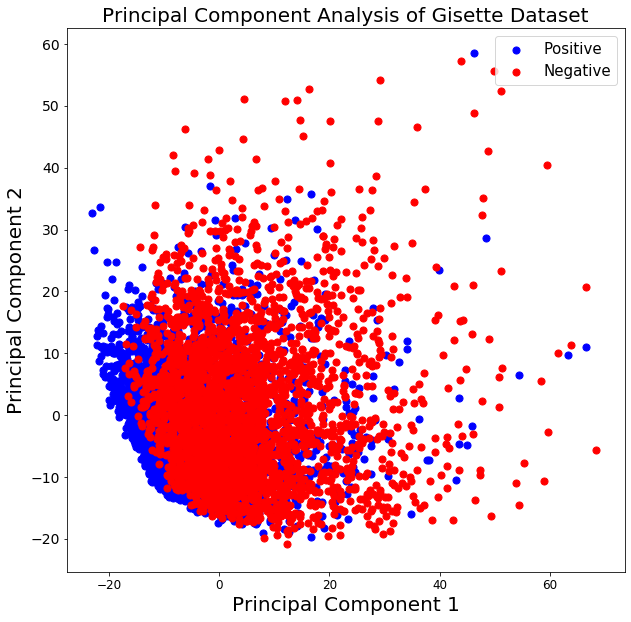

In [211]:
# Let's plot it!
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.title("Principal Component Analysis of Gisette Dataset",fontsize=20)
targets = ['Positive', 'Negative']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = df_train['Labels'] == target
    plt.scatter(principal_gisette_df.loc[indicesToKeep, 'principal component 1']
               , principal_gisette_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [212]:
# How many principal components do we need to explain the variance in data?
pca = PCA().fit(x)

evr = pca.explained_variance_ratio_
print('\n'.join('{:2d}: {:0.4f}'.format(*k) for k in enumerate(evr)))
# FYI: We have to go to 6 significant digits to explain the last PC.

 0: 0.0288
 1: 0.0226
 2: 0.0166
 3: 0.0162
 4: 0.0124
 5: 0.0114
 6: 0.0102
 7: 0.0088
 8: 0.0072
 9: 0.0069
10: 0.0065
11: 0.0056
12: 0.0052
13: 0.0049
14: 0.0047
15: 0.0044
16: 0.0040
17: 0.0039
18: 0.0037
19: 0.0036
20: 0.0035
21: 0.0033
22: 0.0033
23: 0.0032
24: 0.0029
25: 0.0029
26: 0.0028
27: 0.0027
28: 0.0027
29: 0.0026
30: 0.0025
31: 0.0024
32: 0.0024
33: 0.0023
34: 0.0022
35: 0.0022
36: 0.0021
37: 0.0021
38: 0.0021
39: 0.0020
40: 0.0020
41: 0.0019
42: 0.0019
43: 0.0019
44: 0.0019
45: 0.0018
46: 0.0018
47: 0.0017
48: 0.0017
49: 0.0017
50: 0.0016
51: 0.0016
52: 0.0016
53: 0.0016
54: 0.0016
55: 0.0015
56: 0.0015
57: 0.0015
58: 0.0014
59: 0.0014
60: 0.0014
61: 0.0014
62: 0.0014
63: 0.0014
64: 0.0013
65: 0.0013
66: 0.0013
67: 0.0013
68: 0.0013
69: 0.0013
70: 0.0013
71: 0.0013
72: 0.0012
73: 0.0012
74: 0.0012
75: 0.0012
76: 0.0012
77: 0.0012
78: 0.0011
79: 0.0011
80: 0.0011
81: 0.0011
82: 0.0011
83: 0.0011
84: 0.0011
85: 0.0011
86: 0.0011
87: 0.0010
88: 0.0010
89: 0.0010
90: 0.0010

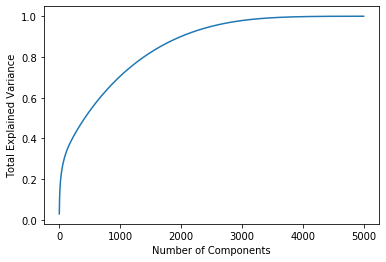

In [213]:
# Graph it...
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance');

### Apply PCA to validation and test sets.

In [256]:
feature_df_valid = pd.read_csv('gisette_valid.data', header=None, delim_whitespace=True)


In [257]:
x = feature_df_valid.values
x = StandardScaler().fit_transform(x)
# ... and check if it worked
np.mean(x),np.std(x)

(-3.0482283364108297e-19, 0.9709788875150683)

In [258]:
# x is now a numpy array. Convert it back to a df?
# ******************************
# WHY?!?!?
# ******************************
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_gisette_valid = pd.DataFrame(x,columns=feat_cols)
normalised_gisette_valid.tail()
normalised_gisette_valid

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature4990,feature4991,feature4992,feature4993,feature4994,feature4995,feature4996,feature4997,feature4998,feature4999
0,2.150789,-0.107319,-0.527650,-0.043429,-0.145705,-0.255291,-0.179896,1.463749,-0.059492,2.225499,...,-0.515306,-0.430603,-0.076676,-0.761491,-0.354934,-0.277508,0.587050,-0.169659,2.328246,-0.463277
1,2.481656,9.367126,-0.527650,-0.043429,-0.145705,-0.255291,-0.179896,0.883276,-0.059492,2.600028,...,-0.515306,-0.430603,-0.076676,1.083201,-0.354934,-0.277508,-0.651759,-0.169659,-0.399396,-0.463277
2,1.345677,-0.107319,1.799059,-0.043429,-0.145705,-0.255291,-0.179896,-0.801048,-0.059492,-0.467397,...,-0.515306,-0.430603,-0.076676,0.357302,-0.354934,-0.277508,-0.651759,3.371452,-0.399396,-0.463277
3,-0.378513,-0.107319,-0.527650,-0.043429,-0.145705,2.600283,7.048041,1.537498,-0.059492,2.575266,...,-0.515306,-0.430603,-0.076676,-0.761491,-0.354934,-0.277508,-0.651759,-0.169659,-0.399396,-0.463277
4,-0.378513,-0.107319,-0.527650,-0.043429,-0.145705,-0.255291,-0.179896,1.456612,-0.059492,2.600028,...,-0.515306,-0.430603,-0.076676,-0.761491,-0.354934,-0.277508,-0.651759,-0.169659,3.062475,-0.463277
5,-0.378513,-0.107319,-0.527650,-0.043429,-0.145705,-0.255291,-0.179896,-0.801048,-0.059492,0.925480,...,2.232366,-0.430603,-0.076676,-0.761491,-0.354934,-0.277508,1.354409,-0.169659,-0.399396,-0.463277
6,-0.378513,-0.107319,-0.527650,-0.043429,-0.145705,-0.255291,-0.179896,1.520845,-0.059492,-0.467397,...,-0.515306,3.027304,-0.076676,-0.761491,-0.354934,-0.277508,-0.651759,-0.169659,-0.399396,-0.463277
7,-0.378513,-0.107319,1.046300,-0.043429,-0.145705,-0.255291,-0.179896,1.473265,-0.059492,-0.467397,...,-0.515306,-0.430603,-0.076676,1.576716,-0.354934,-0.277508,1.813320,-0.169659,-0.399396,-0.463277
8,-0.378513,-0.107319,-0.527650,-0.043429,-0.145705,-0.255291,-0.179896,-0.801048,-0.059492,-0.467397,...,-0.515306,0.885841,-0.076676,-0.761491,-0.354934,-0.277508,1.813320,-0.169659,-0.399396,-0.463277
9,-0.378513,-0.107319,-0.527650,-0.043429,-0.145705,-0.255291,-0.179896,1.047426,-0.059492,-0.467397,...,-0.515306,0.975517,-0.076676,-0.761491,3.221034,-0.277508,-0.651759,-0.169659,-0.399396,-0.463277


In [259]:
principalComponents_gisette_valid = pca_gisette.transform(x)

principal_gisette_df_valid = pd.DataFrame(data = principalComponents_gisette_valid
             , columns = ['principal component 1', 'principal component 2'])

<Figure size 432x288 with 0 Axes>

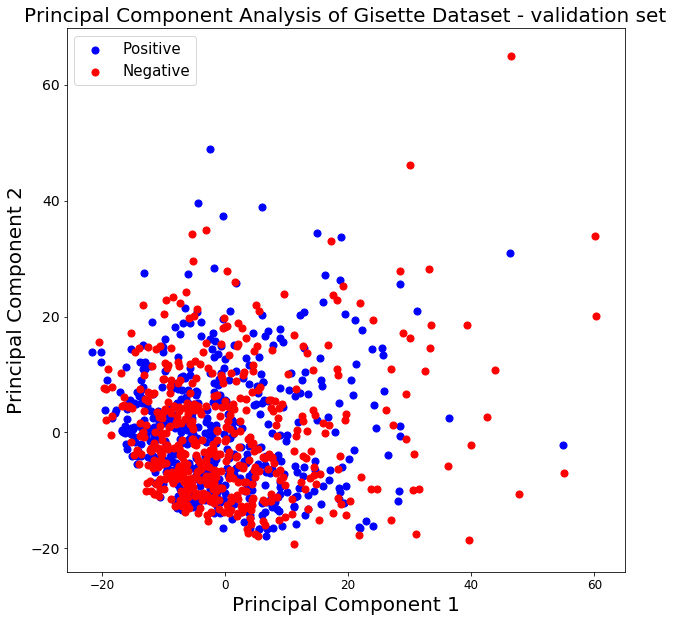

In [263]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.title("Principal Component Analysis of Gisette Dataset - validation set",fontsize=20)
targets = ['Positive', 'Negative']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = df_train['Labels'] == target
    plt.scatter(principal_gisette_df_valid.loc[indicesToKeep, 'principal component 1']
               , principal_gisette_df_valid.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [264]:
feature_df_test = pd.read_csv('gisette_test.data', header=None, delim_whitespace=True)
x = feature_df_test.values
x = StandardScaler().fit_transform(x)
# ... and check if it worked
np.mean(x),np.std(x)

(-1.1379615198865605e-18, 0.9955902771722902)

In [265]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_gisette_test = pd.DataFrame(x,columns=feat_cols)
normalised_gisette_test.tail()
normalised_gisette_test

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature4990,feature4991,feature4992,feature4993,feature4994,feature4995,feature4996,feature4997,feature4998,feature4999
0,3.199217,-0.115878,2.351777,-0.031929,-0.135493,-0.266612,-0.134524,0.512915,-0.066387,-0.456341,...,-0.534139,-0.411972,-0.046335,1.499322,-0.336860,-0.236361,-0.683099,-0.147888,-0.398089,-0.465958
1,-0.376317,-0.115878,-0.503568,-0.031929,-0.135493,-0.266612,-0.134524,-0.744350,-0.066387,1.745894,...,2.039131,-0.411972,-0.046335,0.838796,-0.336860,-0.236361,-0.683099,-0.147888,-0.398089,-0.465958
2,-0.376317,-0.115878,1.596126,-0.031929,-0.135493,-0.266612,-0.134524,-0.744350,-0.066387,-0.456341,...,-0.534139,-0.411972,-0.046335,1.005690,-0.336860,-0.236361,1.810468,-0.147888,-0.398089,-0.465958
3,-0.376317,-0.115878,-0.503568,-0.031929,-0.135493,-0.266612,-0.134524,-0.744350,-0.066387,-0.456341,...,2.111505,-0.411972,-0.046335,-0.776085,-0.336860,-0.236361,0.580173,-0.147888,-0.398089,-0.465958
4,-0.376317,-0.115878,-0.503568,-0.031929,-0.135493,-0.266612,-0.134524,1.625110,-0.066387,2.636295,...,-0.534139,-0.411972,-0.046335,-0.776085,-0.336860,-0.236361,-0.683099,-0.147888,-0.398089,-0.465958
5,1.922501,-0.115878,-0.503568,-0.031929,-0.135493,-0.266612,-0.134524,-0.744350,-0.066387,-0.456341,...,1.618294,-0.411972,-0.046335,-0.776085,-0.336860,-0.236361,-0.683099,-0.147888,-0.398089,-0.465958
6,-0.376317,-0.115878,1.213821,-0.031929,-0.135493,-0.266612,-0.134524,-0.744350,-0.066387,-0.456341,...,-0.534139,-0.411972,-0.046335,-0.776085,-0.336860,-0.236361,-0.683099,-0.147888,-0.398089,2.598045
7,-0.376317,-0.115878,-0.503568,-0.031929,-0.135493,-0.266612,-0.134524,-0.744350,-0.066387,-0.456341,...,-0.534139,-0.411972,-0.046335,-0.776085,-0.336860,-0.236361,0.752668,-0.147888,-0.398089,-0.465958
8,-0.376317,-0.115878,1.655862,-0.031929,-0.135493,4.628907,-0.134524,-0.744350,-0.066387,-0.456341,...,2.111505,3.152777,-0.046335,-0.776085,-0.336860,-0.236361,-0.683099,-0.147888,-0.398089,-0.465958
9,-0.376317,-0.115878,-0.503568,-0.031929,-0.135493,-0.266612,-0.134524,1.651706,-0.066387,2.141980,...,-0.534139,1.693650,-0.046335,-0.776085,2.178167,-0.236361,-0.683099,-0.147888,-0.398089,-0.465958


In [266]:
principalComponents_gisette_test = pca_gisette.transform(x)

principal_gisette_df_test = pd.DataFrame(data = principalComponents_gisette_test
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
# There are no labels for test set. Plotting doesn't make sense.